In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

warnings.filterwarnings("ignore")

In [2]:
data  = load_breast_cancer(return_X_y=False, as_frame=True).data
target = load_breast_cancer(return_X_y=False, as_frame=True).target
df = pd.concat([data, target], axis = 1)
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# dup "0" class samples 10 times
indices_class_0 = df[df['target']== 0].index.values
df_dup = df[df.index.isin(indices_class_0)]
df_dup = pd.concat([df_dup] * 20, ignore_index=True)
df_dup = pd.concat([df, df_dup],  ignore_index=True)

In [4]:
X = df_dup.iloc[:, :-1]
y = df_dup.iloc[:, -1]

In [5]:
# Спліт даних
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

Розподіл класів у тренувальній вибірці:
target
0    3561
1     286
Name: count, dtype: int64


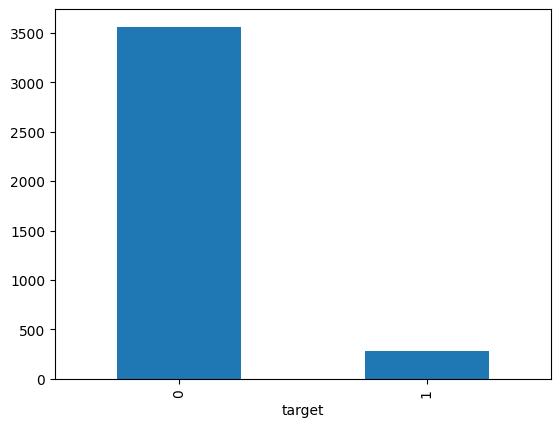

In [6]:
# Елементарний EDA
print("Розподіл класів у тренувальній вибірці:")
y_train.value_counts().plot(kind = 'bar')

print(y_train.value_counts())

In [7]:
numeric_features = X.columns
# cat_features = ...
# date_features = ...
# bin_features = ...
# ...

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('scaler', StandardScaler(), numeric_features)
    ])

In [9]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter = 1000, n_jobs = -1),
        'params': {'classifier__C': [0.1, 1, 10], 'classifier__class_weight': [None, 'balanced',{0: 1, 1: 10}]}
    },
    'SGDClassifier': {
        'model': SGDClassifier(loss = 'log_loss', random_state=42,  max_iter = 1000, n_jobs = -1),
        'params': {'classifier__alpha': [0.0001, 0.001, 0.01], 'classifier__class_weight': [None, 'balanced', {0: 1, 1: 10}]}
    }
}

results = {}

Модель: LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       891
           1       0.76      0.96      0.85        71

    accuracy                           0.98       962
   macro avg       0.88      0.97      0.92       962
weighted avg       0.98      0.98      0.98       962

Матриця плутанини:
[[870  21]
 [  3  68]]
Найкращі параметри:
{'classifier__C': 0.1, 'classifier__class_weight': 'balanced'}




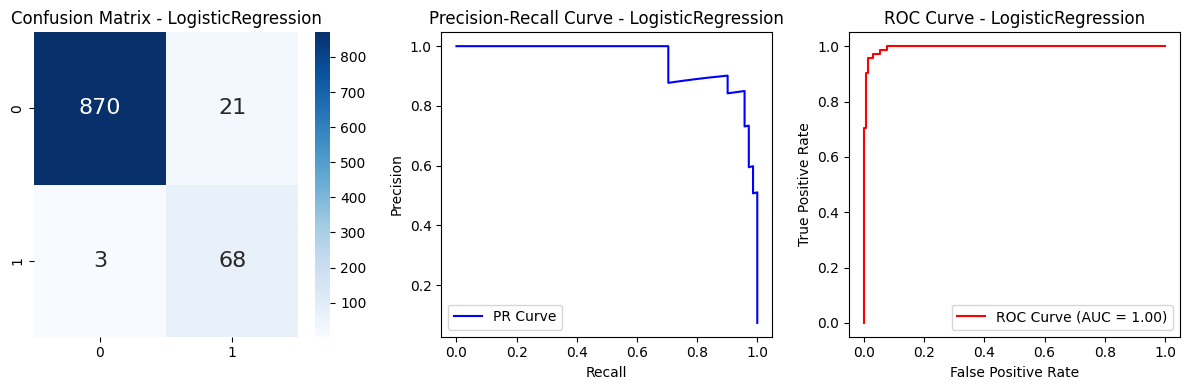

Модель: SGDClassifier
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       891
           1       0.66      0.85      0.74        71

    accuracy                           0.96       962
   macro avg       0.82      0.91      0.86       962
weighted avg       0.96      0.96      0.96       962

Матриця плутанини:
[[860  31]
 [ 11  60]]
Найкращі параметри:
{'classifier__alpha': 0.01, 'classifier__class_weight': {0: 1, 1: 10}}




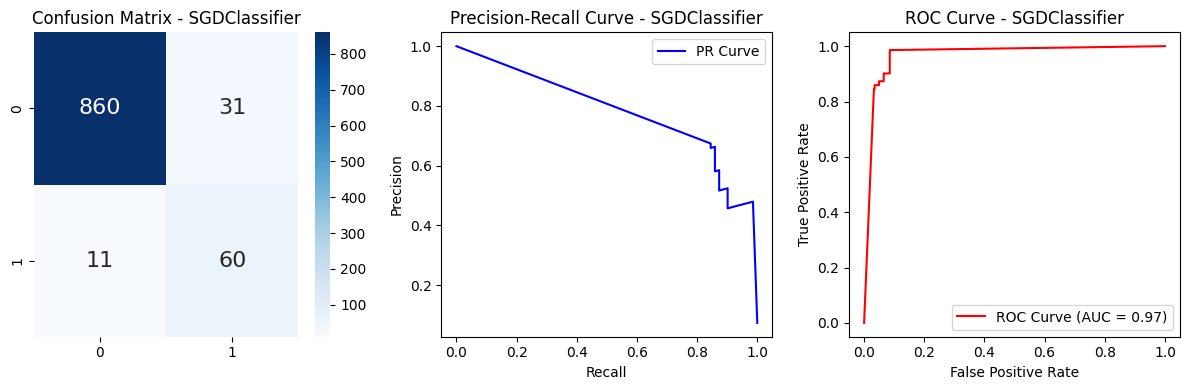

In [10]:
for name, model_info in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])

    grid_search = GridSearchCV(pipeline,
                               model_info['params'],
                               cv=5,
                               scoring='recall')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    results[name] = {
        'model': grid_search,
        'classification_report': classification_rep,
        'confusion_matrix': confusion_mat
    }

# Вивід результатів та побудова графіка
for name, result in results.items():
    print(f"Модель: {name}")
    print(result['classification_report'])
    print("Матриця плутанини:")
    print(result['confusion_matrix'])
    print("Найкращі параметри:")
    print(result['model'].best_params_)
    print("\n")

    # Побудова графіка
    plt.figure(figsize=(12, 4))

    # Матриця плутанини
    plt.subplot(1, 3, 1)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
    plt.title(f'Confusion Matrix - {name}')

    # PR-крива
    plt.subplot(1, 3, 2)
    precision, recall, _ = precision_recall_curve(y_test, result['model'].predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, color='b', label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()

    # ROC-крива
    plt.subplot(1, 3, 3)
    fpr, tpr, _ = roc_curve(y_test, result['model'].predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='r', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
results['LogisticRegression']['model']

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smooth...
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__class_weight': [None, 'balanced',
                                                      {0: 1, 1: 10}]},
             scoring='recall')